# Model of High School 2019

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [3]:
df = pd.read_csv('../data/3-oro/Merge_2019_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467110 entries, 0 to 467109
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 117.6+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,99,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,100,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


In [6]:
df["POB_VICT_CONF"].value_counts()

99    450622
1      14998
9        950
3        247
2        109
4        101
10        74
20         5
17         2
6          1
18         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,0,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,0,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [12]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.423956
3    0.383991
4    0.136013
1    0.056040
Name: NIVEL, dtype: float64

In [13]:
df = df[(df['NIVEL']== 4)]

In [14]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [15]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [16]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.978059
1    0.021941
Name: REPITENTE, dtype: float64

In [17]:
df['REPITENTE'].value_counts()

0    62139
1     1394
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
            Category       p-value
3  DIR_NUM_LOCALIDAD  3.129033e-42
0             GENERO  6.467583e-16
2     CODIGO_JORNADA  8.954699e-08
1      POB_VICT_CONF  2.580358e-03
4         tiene_auto  2.806836e-02


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(63533,)

In [22]:
X = df[variables]
X.shape

(63533, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                            GLM   Df Residuals:                    63519
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6397.8
Date:                Wed, 06 Jul 2022   Deviance:                       12796.
Time:                        23:51:16   Pearson chi2:                 6.24e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                         -0.4546      0.037    -12.429      0.000      -0.526      -0.383
estrato                       0.1251      0.047      2.677      0.007       0.034       0.217
puntaje_sisben_3             -0.0045      0.002     -2.387      0.017      -0.008      -0.001
indice_hacinamiento           0.0259      0.025      1.020      0.308      -0.024       0.076
TOTAL_EQUIPO_COMPUTO          0.0001      0.000      0.636      0.525      -0.000       0.001
ALUMN_POR_DOCENTE             0.0434      0.007      6.162      0.000       0.030       0.057
COMPU_POR_ALUMN               0.2848      0.223      1.277      0.202      -0.152       0.722
TOTAL_DOCENTES_CON_TITULO     0.0009      0.001      0.923      0.356      -0.001       0.003
PROP_DOCENTES_CON_TITULO     -0.4443      0.121     -3.668      0.000      -0.682      -0.207
promepuntaje                 -0.0065      0.002     -2.988      0.003      -0.011      -0.002
GRADO_OVERAGE                 0.1750      0.008     22.216      0.000       0.160       0.190
nparentes                    -0.0204      0.027     -0.748      0.454      -0.074       0.033
tpersona                      0.0071      0.018      0.405      0.685      -0.027       0.042
const                         3.5103      0.824      4.258      0.000       1.895       5.126
=============================================================================================
"""

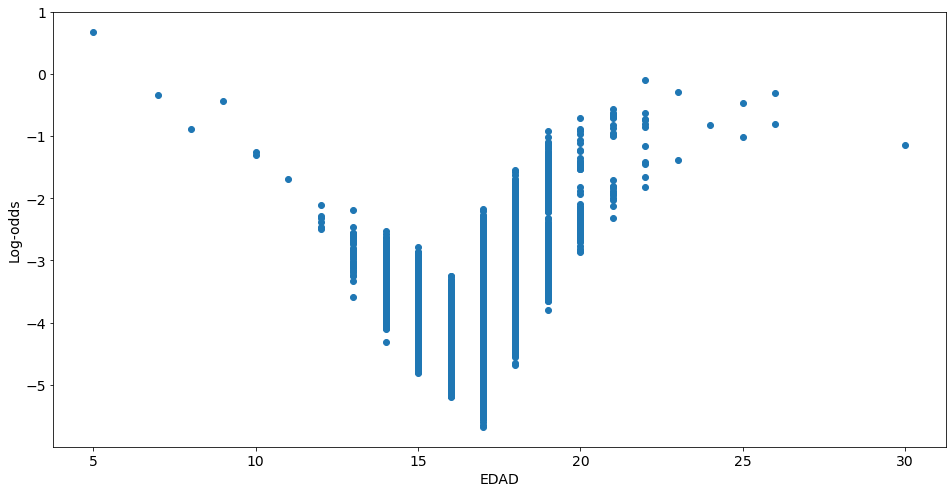

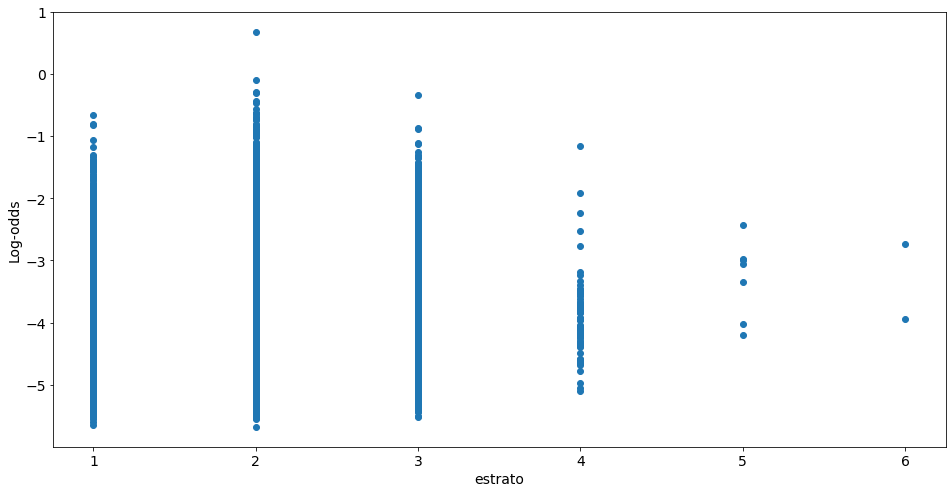

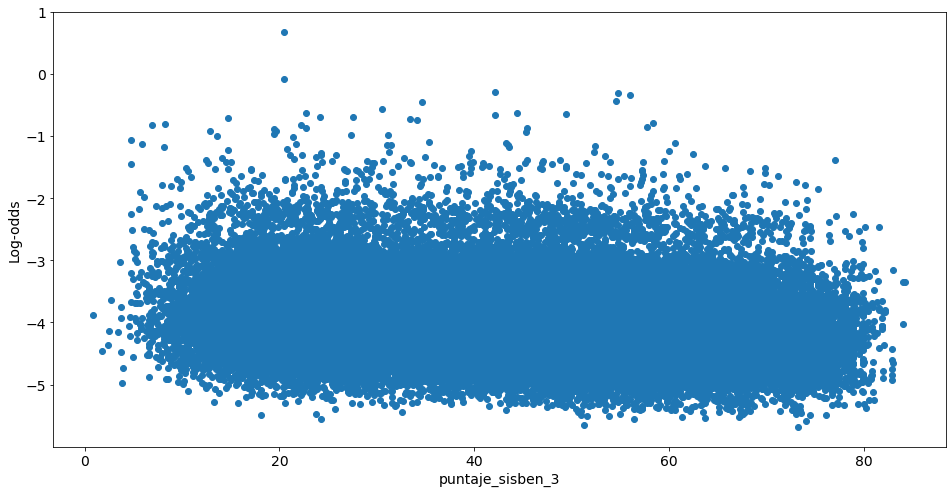

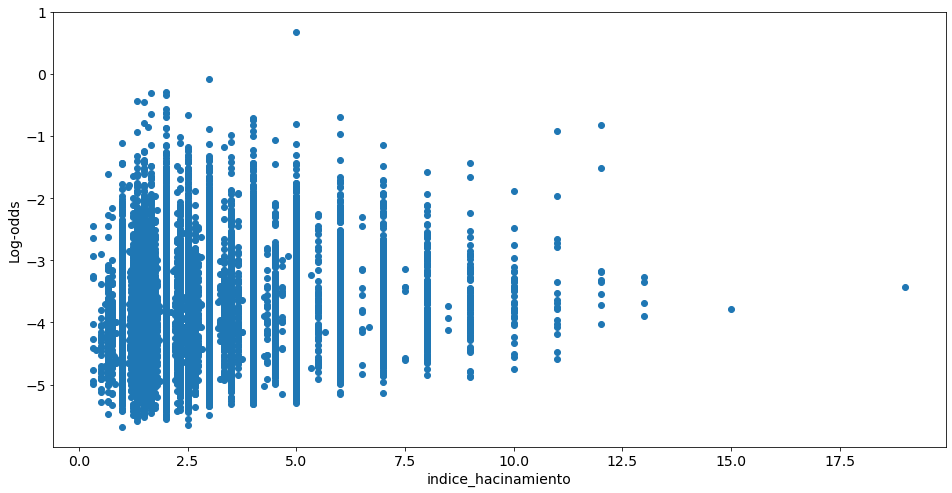

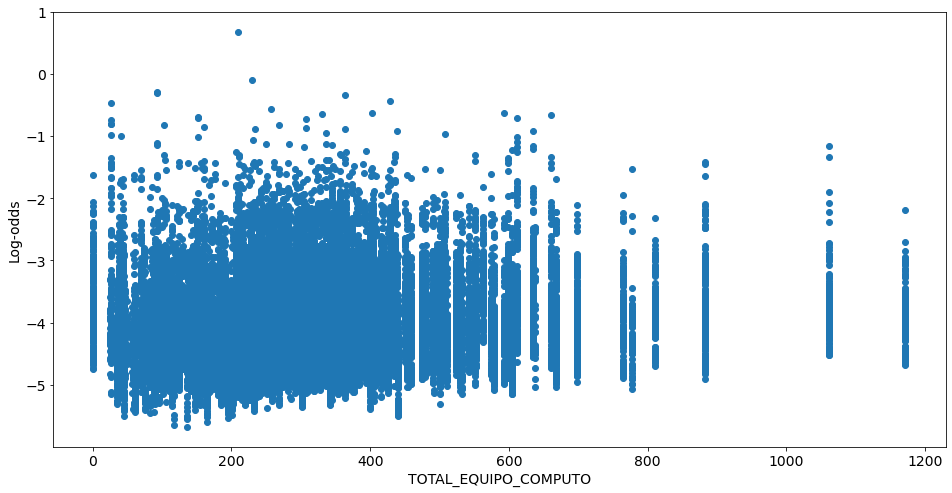

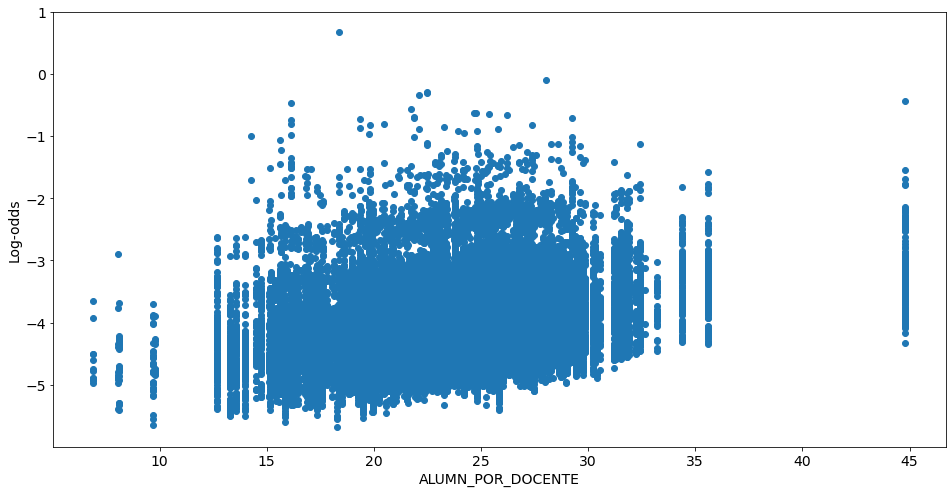

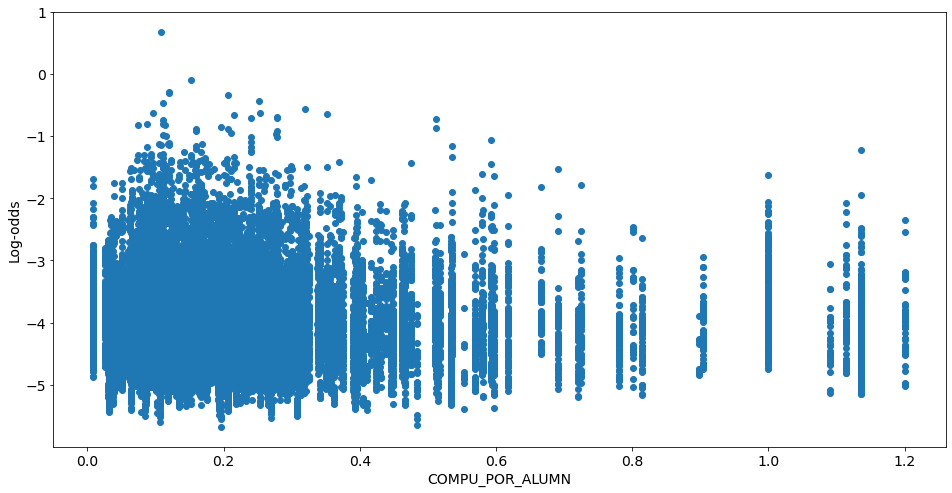

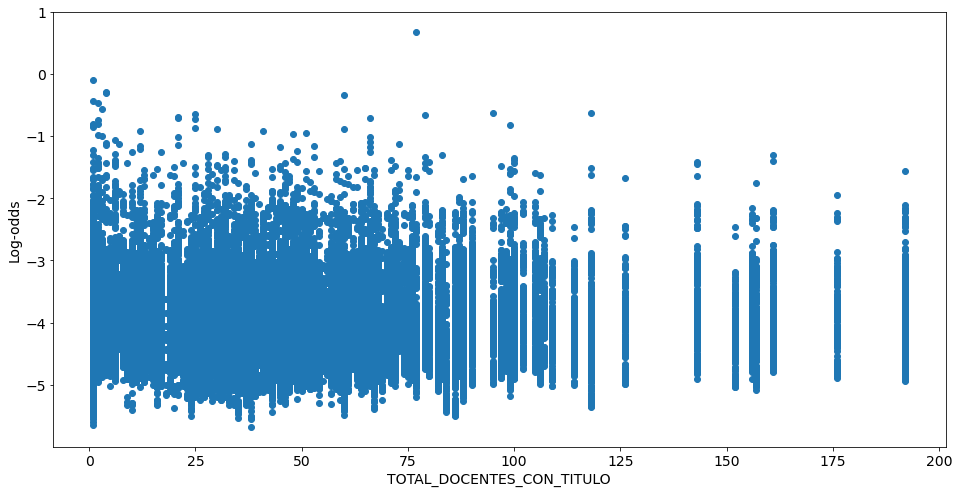

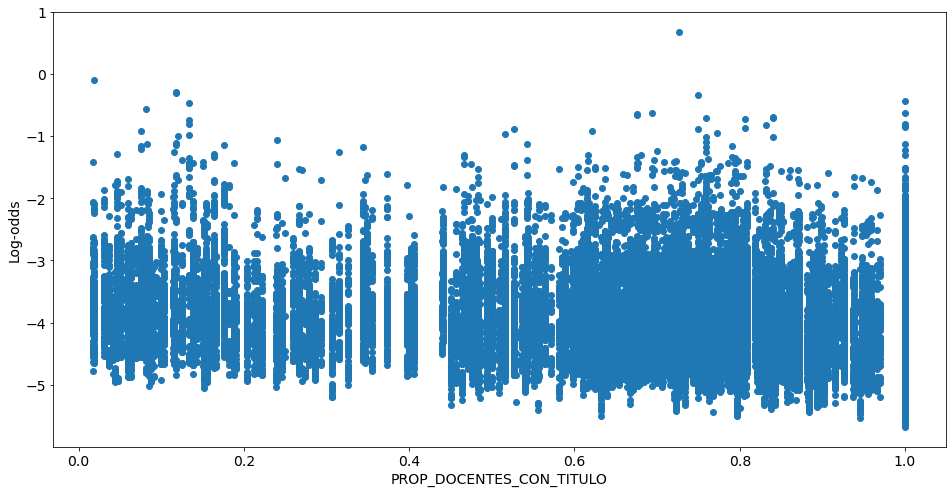

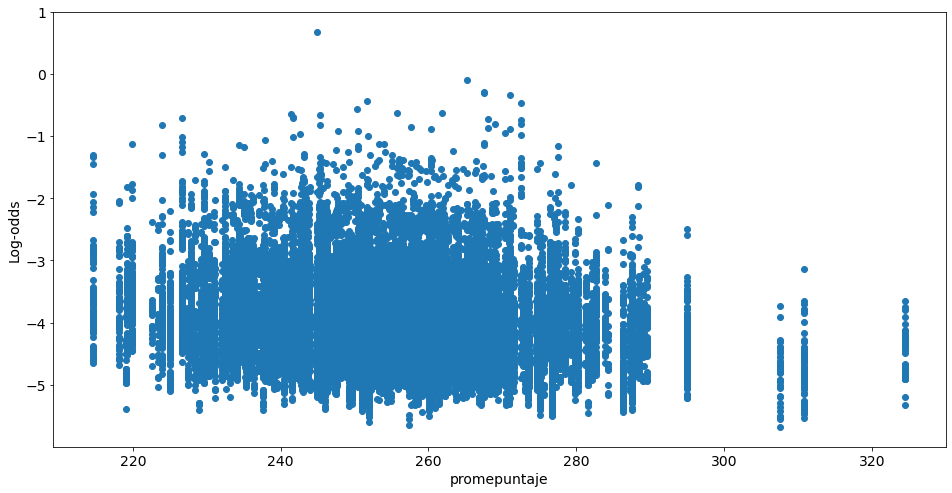

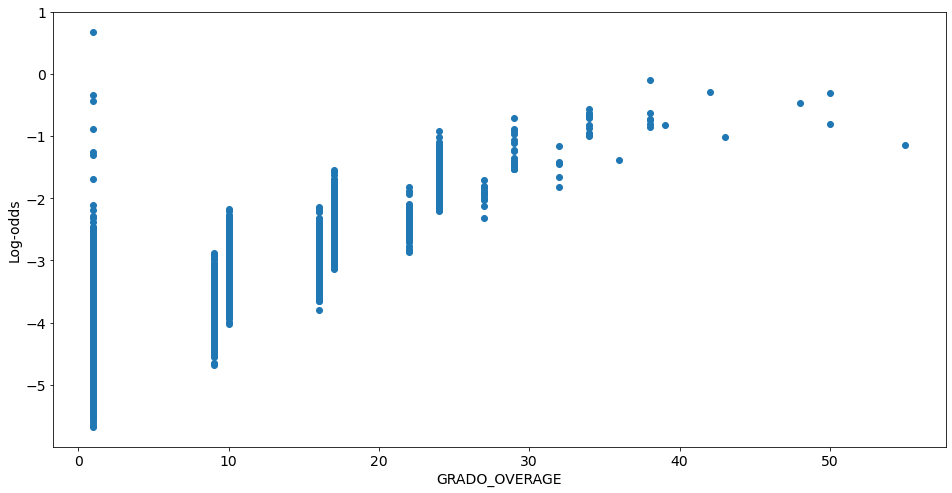

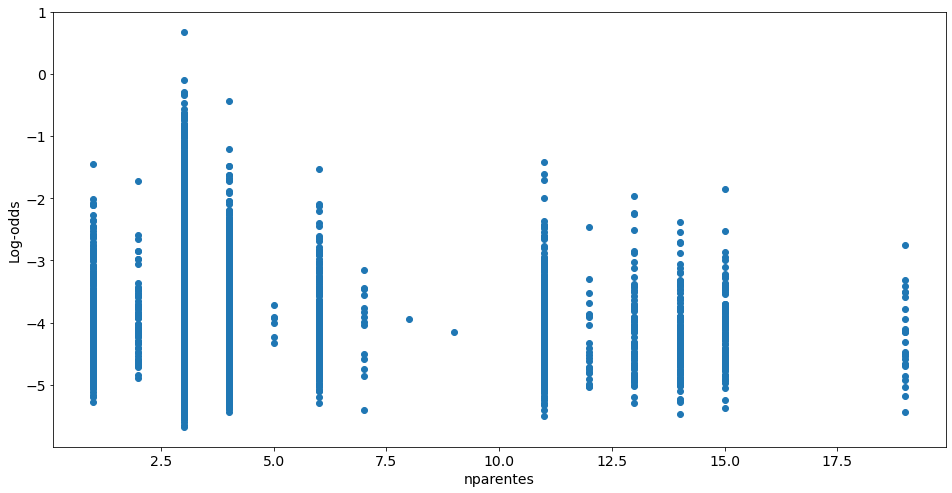

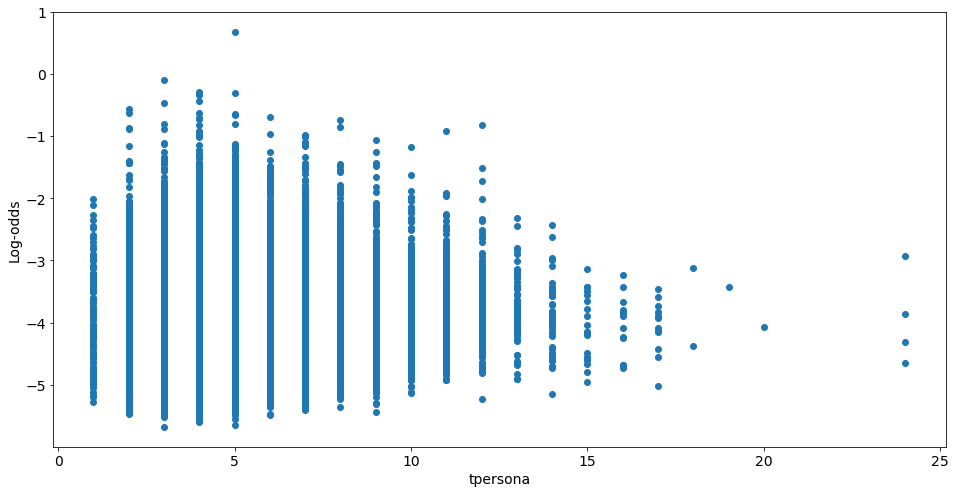

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                            GLM   Df Residuals:                    63506
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6108.0
Date:                Wed, 06 Jul 2022   Deviance:                       12216.
Time:                        23:51:23   Pearson chi2:                 6.26e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                       94.5826      6.954     13.602      0.000      80.954     108.211
estrato                                                     0.6250      0.355      1.758      0.079      -0.072       1.322
puntaje_sisben_3                                            0.0289      0.037      0.790      0.430      -0.043       0.101
indice_hacinamiento                                         0.0530      0.161      0.330      0.742      -0.262       0.368
TOTAL_EQUIPO_COMPUTO                                        0.0083      0.003      2.504      0.012       0.002       0.015
ALUMN_POR_DOCENTE                                           0.4610      0.192      2.399      0.016       0.084       0.838
COMPU_POR_ALUMN                                             0.1132      0.263      0.430      0.667      -0.403       0.629
TOTAL_DOCENTES_CON_TITULO                                  -0.0499      0.010     -5.217      0.000      -0.069      -0.031
PROP_DOCENTES_CON_TITULO                                    0.6347      0.199      3.182      0.001       0.244       1.026
promepuntaje                                                1.0066      0.371      2.713      0.007       0.279       1.734
GRADO_OVERAGE                                              -0.2033      0.061     -3.309      0.001      -0.324      -0.083
nparentes                                                   0.3036      0.324      0.937      0.349      -0.331       0.938
tpersona                                                   -0.0793      0.150     -0.529      0.596      -0.373       0.214
EDAD:Log_EDAD                                             -25.2880      1.853    -13.646      0.000     -28.920     -21.656
estrato:Log_estrato                                        -0.2781      0.214     -1.302      0.193      -0.697       0.141
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0069      0.008     -0.885      0.376      -0.022       0.008
indice_hacinamiento:Log_indice_hacinamiento                -0.0092      0.070     -0.133      0.894      -0.146       0.127
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0012      0.000     -2.449      0.014      -0.002      -0.000
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1004      0.045     -2.209      0.027      -0.189      -0.011
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.4528      0.462      0.979      0.327      -0.454       1.359
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0092      0.002      5.131      0.000       0.006       0.013
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -3.2485      0.450     -7.223      0.000      -4

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                        0.078672
puntaje_sisben_3                               0.429732
indice_hacinamiento                            0.741706
COMPU_POR_ALUMN                                0.667095
nparentes                                      0.348650
tpersona                                       0.596498
estrato:Log_estrato                            0.193072
puntaje_sisben_3:Log_puntaje_sisben_3          0.376252
indice_hacinamiento:Log_indice_hacinamiento    0.894374
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.327498
nparentes:Log_nparentes                        0.314146
tpersona:Log_tpersona                          0.598176
dtype: float64

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'puntaje_sisben_3', 'indice_hacinamiento', 'COMPU_POR_ALUMN',
       'nparentes', 'tpersona', 'estrato:Log_estrato',
       'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN', 'nparentes:Log_nparentes',
       'tpersona:Log_tpersona'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'COMPU_POR_ALUMN',
 'nparentes',
 'tpersona']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

7

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.096139
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                          Logit   Df Residuals:                    63506
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                 0.08874
Time:                        23:51:24   Log-Likelihood:                -6108.0
converged:                       True   LL-Null:                       -6702.8
Covariance Type:            nonrobust   LLR p-value:                1.951e-234
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -439.1861     32.423    -13.545      0.000    -502.734    -375.638
EDAD                                                           94.5826      6.954     13.602      0.000      80.954     108.211
EDAD:np.log(EDAD)                                             -25.2880      1.853    -13.646      0.000     -28.920     -21.656
estrato                                                         0.6250      0.355      1.758      0.079      -0.072       1.322
estrato:np.log(estrato)                                        -0.2781      0.214     -1.302      0.193      -0.697       0.141
puntaje_sisben_3                                                0.0290      0.037      0.790      0.430      -0.043       0.101
puntaje_sisben_3:np.log(puntaje_sisben_3)                      -0.0069      0.008     -0.885      0.376      -0.022       0.008
indice_hacinamiento                                             0.0526      0.161      0.327      0.744      -0.263       0.368
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0091      0.070     -0.130      0.896      -0.146       0.127
TOTAL_EQUIPO_COMPUTO                                            0.0083      0.003      2.504      0.012       0.002       0.015
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              -0.0012      0.000     -2.449      0.014      -0.002      -0.000
ALUMN_POR_DOCENTE                                               0.4610      0.192      2.399      0.016       0.084       0.838
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                    -0.1004      0.045     -2.209      0.027      -0.189      -0.011
COMPU_POR_ALUMN                                                 0.1132      0.263      0.430      0.667      -0.403       0.629
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                         0.4528      0.462      0.979      0.328      -0.454       1.359
TOTAL_DOCENTES_CON_TITULO                                      -0.0499      0.010     -5.217      0.000      -0.069      -0.031
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)     0.0092      0.002      5.131      0.000       0.006       0.013
PROP_DOCENTES_CON_TITULO                                        0.6347      0.199      3.182      0.001       0.244       1.026
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      -3.2485      0.450     -7.223      0.000      -4.130      -2.367
promepuntaje                                                    1.0066      0.371      2.713      0.007       0.279       1.734
promepuntaje:np.log(promepuntaje)                              -0.1546      0.057     -2.724      0.006      -0.266      -0.043
GRADO_OVERAGE                                                  -0.2033      0.061     -3.309      0.001      -0.324      -0.083
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

estrato                                            0.078672
estrato:np.log(estrato)                            0.193071
puntaje_sisben_3                                   0.429543
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.376059
indice_hacinamiento                                0.743682
indice_hacinamiento:np.log(indice_hacinamiento)    0.896484
COMPU_POR_ALUMN                                    0.667076
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            0.327513
nparentes                                          0.348652
nparentes:np.log(nparentes)                        0.314147
tpersona                                           0.596974
tpersona:np.log(tpersona)                          0.598644
dtype: float64

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'COMPU_POR_ALUMN',
 'nparentes',
 'tpersona']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                63533
Model:                            GLM   Df Residuals:                    63526
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6692.2
Date:                Wed, 06 Jul 2022   Deviance:                       13384.
Time:                        23:51:24   Pearson chi2:                 6.35e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estrato                 0.0461      0.043      1.067      0.286      -0.039       0.131
puntaje_sisben_3       -0.0056      0.002     -3.005      0.003      -0.009      -0.002
indice_hacinamiento     0.0288      0.025      1.138      0.255      -0.021       0.079
COMPU_POR_ALUMN        -0.1553      0.185     -0.841      0.400      -0.517       0.207
nparentes              -0.0132      0.027     -0.484      0.628      -0.067       0.040
tpersona                0.0148      0.017      0.854      0.393      -0.019       0.049
const                  -3.7210      0.180    -20.627      0.000      -4.075      -3.367
=======================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
435546,0.026628,8.244394
293904,0.014613,6.719156
371711,0.010204,7.566618
181472,0.010156,7.347379
232494,0.008567,6.476182


In [53]:
extreme.index

Int64Index([   208,   2208,   2272,   2314,   4084,   6784,   6789,   6802,
              6818,   6832,
            ...
            450584, 450636, 450695, 451514, 451657, 455040, 455087, 455107,
            455615, 464865],
           dtype='int64', length=1394)

In [54]:
df.index

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            467086, 467091, 467092, 467094, 467095, 467099, 467100, 467101,
            467107, 467109],
           dtype='int64', length=63533)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    1394
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([     0,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            467086, 467091, 467092, 467094, 467095, 467099, 467100, 467101,
            467107, 467109],
           dtype='int64', length=63533)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


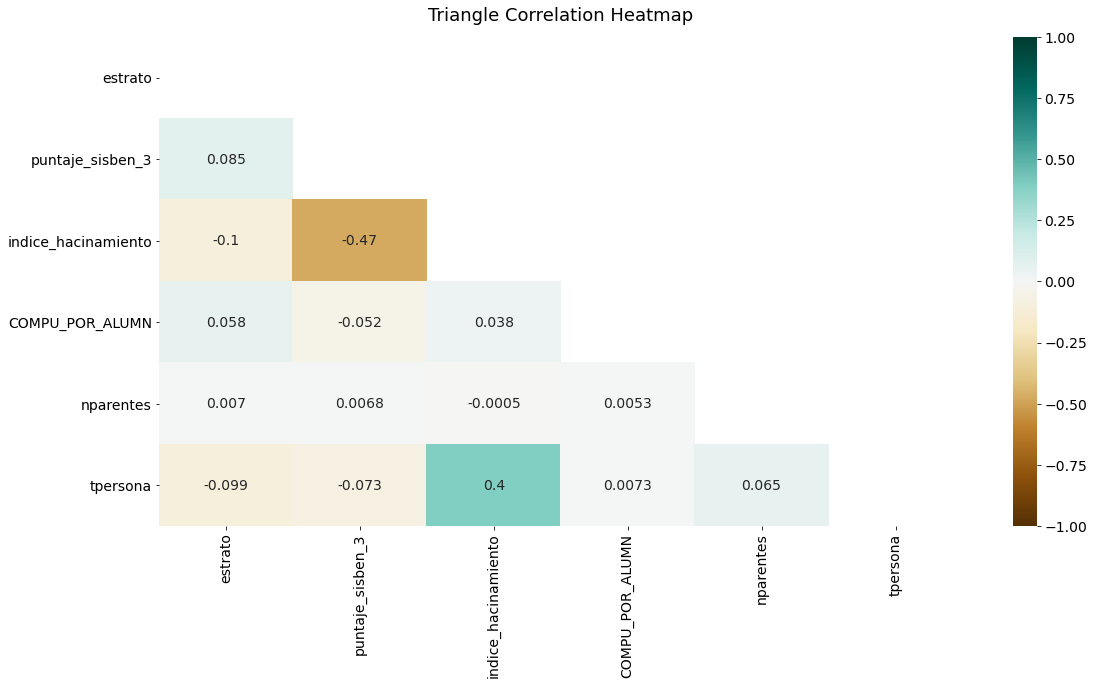

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,8.499119
1,puntaje_sisben_3,7.286138
2,indice_hacinamiento,6.544683
3,COMPU_POR_ALUMN,2.587155
4,nparentes,8.175814
5,tpersona,9.889013


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['nparentes',
 'estrato',
 'indice_hacinamiento',
 'puntaje_sisben_3',
 'tpersona',
 'COMPU_POR_ALUMN']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,2
1,POB_VICT_CONF,1
2,CODIGO_JORNADA,1
3,DIR_NUM_LOCALIDAD,0
4,tiene_auto,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,2,POB_VICT_CONF
1,POB_VICT_CONF,1,CODIGO_JORNADA
2,CODIGO_JORNADA,1,DIR_NUM_LOCALIDAD
3,DIR_NUM_LOCALIDAD,0,tiene_auto
4,tiene_auto,0,NaN


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,2,POB_VICT_CONF,8.781311e-01
1,1,POB_VICT_CONF,1,CODIGO_JORNADA,1.761292e-24
2,2,CODIGO_JORNADA,1,DIR_NUM_LOCALIDAD,0.000000e+00
3,3,DIR_NUM_LOCALIDAD,0,tiene_auto,5.382730e-68
4,4,tiene_auto,0,NaN,1.000000e+00


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

1


In [73]:
cat_iid

['GENERO', 'POB_VICT_CONF']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['nparentes',
 'estrato',
 'indice_hacinamiento',
 'puntaje_sisben_3',
 'tpersona',
 'COMPU_POR_ALUMN']

In [78]:
categorias

['GENERO', 'POB_VICT_CONF']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,nparentes,estrato,indice_hacinamiento,puntaje_sisben_3,tpersona,COMPU_POR_ALUMN,const,GENERO_1,POB_VICT_CONF_1
0,3,3,2.5,43.919998,5,0.568627,1.0,0,0
2,3,3,3.0,46.810001,3,0.568627,1.0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                44473
Model:                            GLM   Df Residuals:                    44464
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4681.6
Date:                Wed, 06 Jul 2022   Deviance:                       9363.2
Time:                        23:51:27   Pearson chi2:                 4.45e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes              -0.0497      0.039     -1.288      0.198      -0.125       0.026
estrato                 0.0632      0.052      1.225      0.220      -0.038       0.164
indice_hacinamiento     0.0341      0.030      1.129      0.259      -0.025       0.093
puntaje_sisben_3       -0.0055      0.002     -2.469      0.014      -0.010      -0.001
tpersona                0.0054      0.021      0.260      0.795      -0.036       0.046
COMPU_POR_ALUMN        -0.0604      0.215     -0.281      0.778      -0.481       0.360
const                  -3.8726      0.227    -17.050      0.000      -4.318      -3.427
GENERO_1                0.4390      0.065      6.721      0.000       0.311       0.567
POB_VICT_CONF_1         0.4000      0.154      2.594      0.009       0.098       0.702
=======================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.022691, G-Mean=0.563


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    10481
1     8579
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[10304  8344]
 [  177   235]]


<AxesSubplot:>

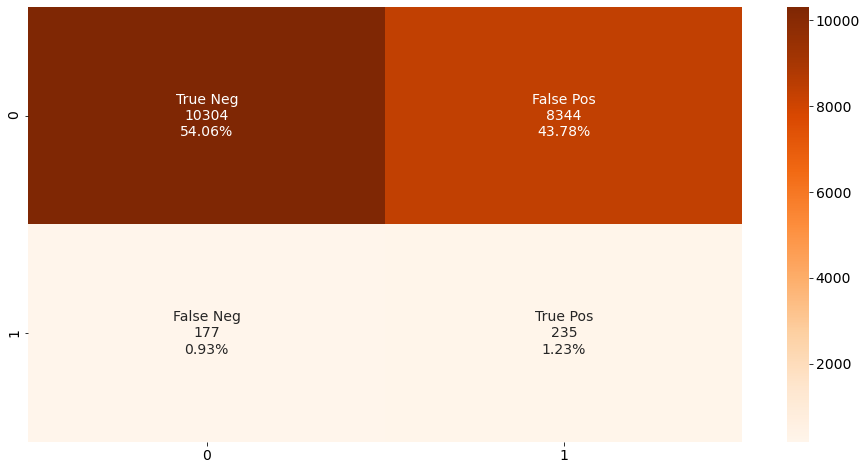

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71     18648
           1       0.03      0.57      0.05       412

    accuracy                           0.55     19060
   macro avg       0.51      0.56      0.38     19060
weighted avg       0.96      0.55      0.69     19060



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,nparentes,estrato,indice_hacinamiento,puntaje_sisben_3,tpersona,COMPU_POR_ALUMN,const,GENERO_1,POB_VICT_CONF_1
0,3,3,2.5,43.919998,5,0.568627,1.0,0,0
2,3,3,3.0,46.810001,3,0.568627,1.0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                44473
Model:                            GLM   Df Residuals:                  1893.28
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1306.2
Date:                Wed, 06 Jul 2022   Deviance:                       2612.3
Time:                        23:51:28   Pearson chi2:                 1.90e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes              -0.0334      0.048     -0.689      0.491      -0.128       0.061
estrato                 0.0073      0.074      0.098      0.922      -0.139       0.153
indice_hacinamiento     0.0481      0.044      1.092      0.275      -0.038       0.134
puntaje_sisben_3       -0.0040      0.003     -1.252      0.210      -0.010       0.002
tpersona                0.0043      0.031      0.141      0.888      -0.056       0.064
COMPU_POR_ALUMN        -0.2020      0.306     -0.660      0.509      -0.802       0.398
const                  -0.0611      0.312     -0.196      0.845      -0.673       0.550
GENERO_1                0.3770      0.092      4.077      0.000       0.196       0.558
POB_VICT_CONF_1         0.3339      0.247      1.353      0.176      -0.150       0.818
=======================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.507595, G-Mean=0.580


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[10467  8168]
 [  171   254]]


<AxesSubplot:>

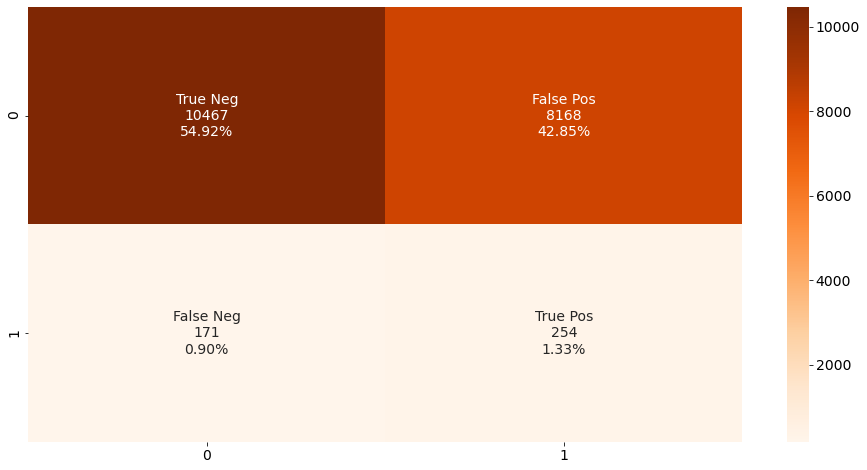

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.98      0.56      0.72     18635
           1       0.03      0.60      0.06       425

    accuracy                           0.56     19060
   macro avg       0.51      0.58      0.39     19060
weighted avg       0.96      0.56      0.70     19060



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,nparentes,estrato,indice_hacinamiento,puntaje_sisben_3,tpersona,COMPU_POR_ALUMN,const,GENERO_1,POB_VICT_CONF_1
384528,3,1,5.0,20.910000,5,0.165914,1.0,1,0
437243,3,2,3.0,49.450001,6,0.090144,1.0,1,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

1    993
0    958
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                 1951
Model:                            GLM   Df Residuals:                     1942
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.0
Date:                Wed, 06 Jul 2022   Deviance:                       2675.9
Time:                        23:51:29   Pearson chi2:                 1.95e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
nparentes              -0.0556      0.042     -1.318      0.188      -0.138       0.027
estrato                 0.0261      0.074      0.354      0.723      -0.118       0.170
indice_hacinamiento    -0.0268      0.043     -0.620      0.535      -0.112       0.058
puntaje_sisben_3       -0.0035      0.003     -1.117      0.264      -0.010       0.003
tpersona                0.0312      0.030      1.050      0.294      -0.027       0.089
COMPU_POR_ALUMN        -0.1064      0.301     -0.353      0.724      -0.697       0.484
const                   0.0167      0.307      0.054      0.957      -0.584       0.618
GENERO_1                0.4310      0.092      4.708      0.000       0.252       0.610
POB_VICT_CONF_1         0.3253      0.224      1.451      0.147      -0.114       0.765
=======================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.538459, G-Mean=0.543


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[250 186]
 [196 205]]


<AxesSubplot:>

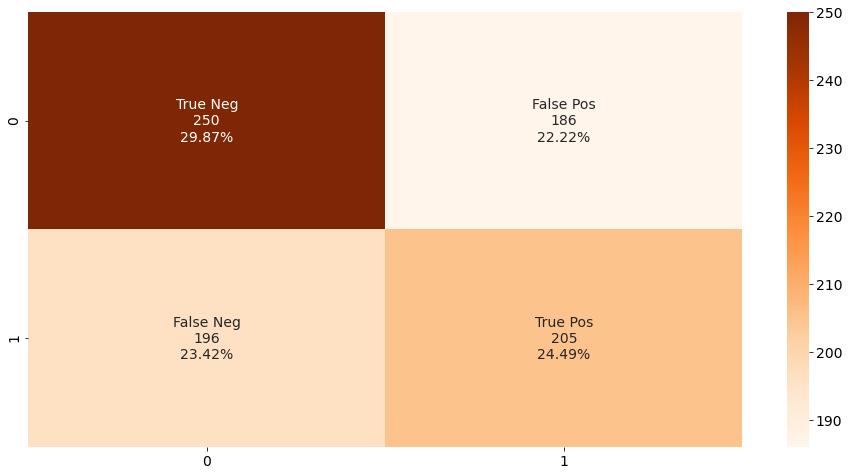

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       436
           1       0.52      0.51      0.52       401

    accuracy                           0.54       837
   macro avg       0.54      0.54      0.54       837
weighted avg       0.54      0.54      0.54       837



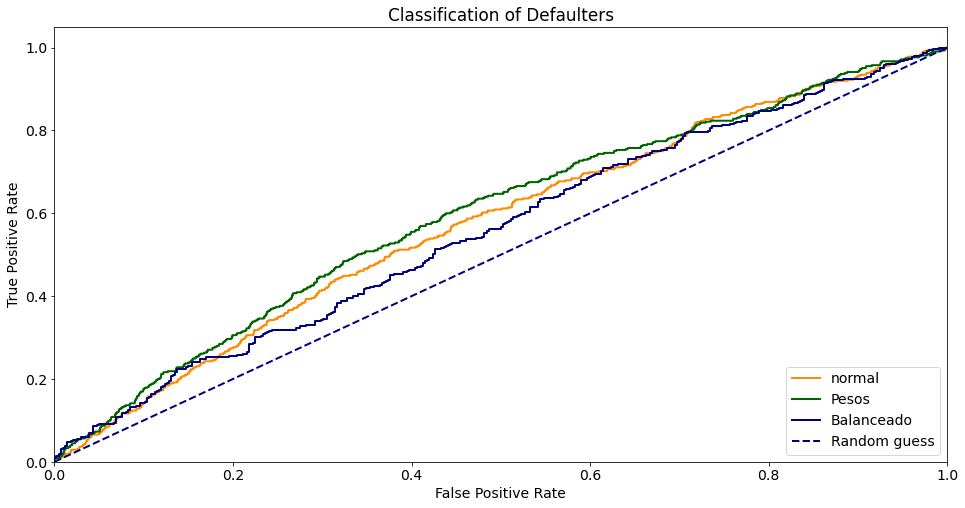

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.5757661484299834
AUC of the model pesos  0.5955601571994508
AUC of the model balanceado  0.5573222906037658


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica con Pesos


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['nparentes',
 'estrato',
 'indice_hacinamiento',
 'puntaje_sisben_3',
 'tpersona',
 'COMPU_POR_ALUMN']

In [123]:
categorias

['GENERO', 'POB_VICT_CONF']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

1

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [133]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2019
tab['nivel'] = 'Media'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,nparentes,-0.049687,1.978509e-01,2019,Media,Regresion Logistica Simple,No
1,estrato,0.063186,2.204630e-01,2019,Media,Regresion Logistica Simple,No
2,indice_hacinamiento,0.034070,2.590680e-01,2019,Media,Regresion Logistica Simple,No
3,puntaje_sisben_3,-0.005483,1.354235e-02,2019,Media,Regresion Logistica Simple,No
4,tpersona,0.005431,7.951335e-01,2019,Media,Regresion Logistica Simple,No
5,COMPU_POR_ALUMN,-0.060375,7.783717e-01,2019,Media,Regresion Logistica Simple,No
6,const,-3.872649,3.499106e-65,2019,Media,Regresion Logistica Simple,No
7,GENERO_1,0.438959,1.810647e-11,2019,Media,Regresion Logistica Simple,No
8,POB_VICT_CONF_1,0.399962,9.483498e-03,2019,Media,Regresion Logistica Simple,No
9,nparentes,-0.033359,4.906054e-01,2019,Media,Regresión Logistica con Pesos,Si


In [134]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [135]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [137]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,nparentes,-0.049687,No,2019,Media,Regresion Logistica Simple,No
1,estrato,0.063186,No,2019,Media,Regresion Logistica Simple,No
2,indice_hacinamiento,0.034070,No,2019,Media,Regresion Logistica Simple,No
3,puntaje_sisben_3,-0.005483,Si,2019,Media,Regresion Logistica Simple,No
4,tpersona,0.005431,No,2019,Media,Regresion Logistica Simple,No
5,COMPU_POR_ALUMN,-0.060375,No,2019,Media,Regresion Logistica Simple,No
6,const,-3.872649,Si,2019,Media,Regresion Logistica Simple,No
7,GENERO_1,0.438959,Si,2019,Media,Regresion Logistica Simple,No
8,POB_VICT_CONF_1,0.399962,Si,2019,Media,Regresion Logistica Simple,No
9,nparentes,-0.033359,No,2019,Media,Regresión Logistica con Pesos,Si


In [138]:
tab.to_csv('../data/3-oro/t19m.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,nparentes,-0.033359
1,estrato,0.007316
2,indice_hacinamiento,0.048079
3,puntaje_sisben_3,-0.003960
4,tpersona,0.004296
5,COMPU_POR_ALUMN,-0.202009
6,const,-0.061050
7,GENERO_1,0.376970
8,POB_VICT_CONF_1,0.333905


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,nparentes,-0.055558
1,estrato,0.026102
2,indice_hacinamiento,-0.026846
3,puntaje_sisben_3,-0.003527
4,tpersona,0.031202
5,COMPU_POR_ALUMN,-0.106394
6,const,0.016670
7,GENERO_1,0.431001
8,POB_VICT_CONF_1,0.325315


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [143]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [144]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
0,16,3,43.919998,2.5,319,19.344828,0.568627,28,0.965517,265.478873,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15,3,46.810001,3.0,319,19.344828,0.568627,28,0.965517,265.478873,0,3,3,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [145]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [146]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                44473
Model:                            GLM   Df Residuals:                    44413
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4295.3
Date:                Thu, 07 Jul 2022   Deviance:                       8590.6
Time:                        15:22:39   Pearson chi2:                 4.53e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                         -0.4462      0.044    -10.147      0.000      -0.532      -0.360
estrato                       0.2168      0.065      3.344      0.001       0.090       0.344
puntaje_sisben_3             -0.0037      0.002     -1.517      0.129      -0.008       0.001
indice_hacinamiento           0.0019      0.032      0.059      0.953      -0.060       0.064
TOTAL_EQUIPO_COMPUTO       6.212e-05      0.000      0.213      0.832      -0.001       0.001
ALUMN_POR_DOCENTE             0.0569      0.010      5.616      0.000       0.037       0.077
COMPU_POR_ALUMN               0.9175      0.380      2.415      0.016       0.173       1.662
TOTAL_DOCENTES_CON_TITULO     0.0010      0.002      0.622      0.534      -0.002       0.004
PROP_DOCENTES_CON_TITULO     -0.2180      0.180     -1.213      0.225      -0.570       0.134
promepuntaje                 -0.0038      0.003     -1.295      0.195      -0.010       0.002
GRADO_OVERAGE                 0.1760      0.009     19.333      0.000       0.158       0.194
nparentes                    -0.0121      0.031     -0.397      0.692      -0.072       0.048
tpersona                      0.0219      0.022      1.016      0.309      -0.020       0.064
const                       -17.1319      2e+04     -0.001      0.999   -3.92e+04    3.91e+04
GENERO_1                      0.3075      0.067      4.570      0.000       0.176       0.439
POB_VICT_CONF_1               0.2959      0.162      1.831      0.067      -0.021       0.613
PROVIENE_OTR_MUN_1           -0.4282      0.420     -1.019      0.308      -1.252       0.395
TIPO_DISCAPACIDAD_1          -1.1940      0.310     -3.857      0.000      -1.801      -0.587
CODIGO_ETNIA_1               -0.6040      0.719     -0.840      0.401      -2.014       0.806
CODIGO_ETNIA_2                0.1043      0.466      0.224      0.823      -0.809       1.017
CODIGO_ETNIA_3              -19.2953   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
CODIGO_ETNIA_4              -21.2519   7.51e+04     -0.000      1.000   -1.47e+05    1.47e+05
CODIGO_ETNIA_5              -20.9741   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
CODIGO_JORNADA_2             20.0072      2e+04      0.001      0.999   -3.91e+04    3.92e+04
CODIGO_JORNADA_3             19.9678      2e+04      0.001      0.999   -3.91e+04    3.92e+04
CODIGO_JORNADA_6             20.5515      2e+04      0.001      0.999   -3.91e+04    3.92e+04
DIR_NUM_LOCALIDAD_2           0.4315      0.504      0.856      0.392      -0.556       1.419
DIR_NUM_LOCALIDAD_3          -1.8080      0.736     -2.455      0.014      -3.251      -0.365
DIR_NUM_LOCALIDAD_4          -0.2039      0.225     -0.908      0.364      -0.644       0.236
DIR_NUM_LOCALIDAD_5          -0.3352      0.220     -1.526      0.127      

In [147]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.025893, G-Mean=0.663


In [148]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [149]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [150]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[14164  4472]
 [  180   244]]


<AxesSubplot:>

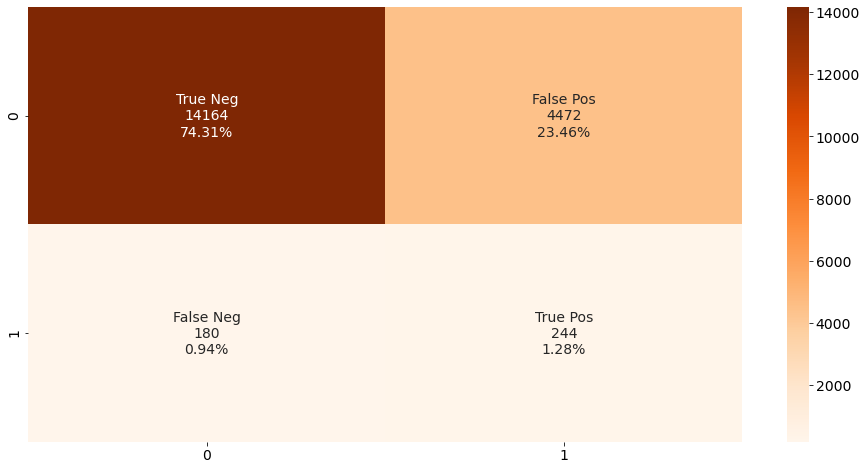

In [151]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [152]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       436
           1       0.52      0.51      0.52       401

    accuracy                           0.54       837
   macro avg       0.54      0.54      0.54       837
weighted avg       0.54      0.54      0.54       837



----------------------------

### Model with all variables with weights

In [153]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [154]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [155]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
0,16,3,43.919998,2.5,319,19.344828,0.568627,28,0.965517,265.478873,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15,3,46.810001,3.0,319,19.344828,0.568627,28,0.965517,265.478873,0,3,3,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [157]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [158]:
pesos = y_train_w_all.apply(pesos)

In [159]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                44473
Model:                            GLM   Df Residuals:                  1848.06
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1142.8
Date:                Thu, 07 Jul 2022   Deviance:                       2285.5
Time:                        15:24:15   Pearson chi2:                 1.89e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                         -0.4553      0.082     -5.566      0.000      -0.616      -0.295
estrato                       0.2298      0.101      2.275      0.023       0.032       0.428
puntaje_sisben_3             -0.0031      0.004     -0.814      0.416      -0.011       0.004
indice_hacinamiento           0.0192      0.050      0.385      0.700      -0.079       0.117
TOTAL_EQUIPO_COMPUTO        1.34e-05      0.000      0.029      0.977      -0.001       0.001
ALUMN_POR_DOCENTE             0.0651      0.017      3.933      0.000       0.033       0.097
COMPU_POR_ALUMN               1.4702      0.575      2.558      0.011       0.344       2.597
TOTAL_DOCENTES_CON_TITULO     0.0026      0.002      1.082      0.279      -0.002       0.007
PROP_DOCENTES_CON_TITULO     -0.2705      0.266     -1.018      0.309      -0.791       0.250
promepuntaje                 -0.0033      0.005     -0.696      0.487      -0.012       0.006
GRADO_OVERAGE                 0.1758      0.016     11.165      0.000       0.145       0.207
nparentes                    -0.0477      0.055     -0.869      0.385      -0.155       0.060
tpersona                      0.0381      0.034      1.131      0.258      -0.028       0.104
const                       -16.1359   7.49e+04     -0.000      1.000   -1.47e+05    1.47e+05
GENERO_1                      0.4419      0.103      4.311      0.000       0.241       0.643
POB_VICT_CONF_1               0.1367      0.286      0.479      0.632      -0.423       0.696
PROVIENE_OTR_MUN_1           -0.2454      0.633     -0.388      0.698      -1.486       0.995
TIPO_DISCAPACIDAD_1          -0.5437      0.428     -1.271      0.204      -1.382       0.295
CODIGO_ETNIA_1               -0.4370      0.900     -0.486      0.627      -2.200       1.326
CODIGO_ETNIA_2                0.1226      0.802      0.153      0.878      -1.448       1.694
CODIGO_ETNIA_3              -22.3301   5.36e+05  -4.16e-05      1.000   -1.05e+06    1.05e+06
CODIGO_ETNIA_4              -23.5301    2.1e+05     -0.000      1.000   -4.11e+05    4.11e+05
CODIGO_ETNIA_5              -23.6189   8.51e+04     -0.000      1.000   -1.67e+05    1.67e+05
CODIGO_JORNADA_2             22.6182   7.49e+04      0.000      1.000   -1.47e+05    1.47e+05
CODIGO_JORNADA_3             22.6078   7.49e+04      0.000      1.000   -1.47e+05    1.47e+05
CODIGO_JORNADA_6             23.1520   7.49e+04      0.000      1.000   -1.47e+05    1.47e+05
DIR_NUM_LOCALIDAD_2           0.4771      0.833      0.573      0.567      -1.155       2.110
DIR_NUM_LOCALIDAD_3          -2.1083      1.146     -1.840      0.066      -4.354       0.138
DIR_NUM_LOCALIDAD_4          -0.0306      0.361     -0.085      0.933      -0.739       0.678
DIR_NUM_LOCALIDAD_5          -0.4104      0.353     -1.162      0.245      

In [160]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.496764, G-Mean=0.645


In [161]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [162]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [163]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[12665  5975]
 [  164   256]]


<AxesSubplot:>

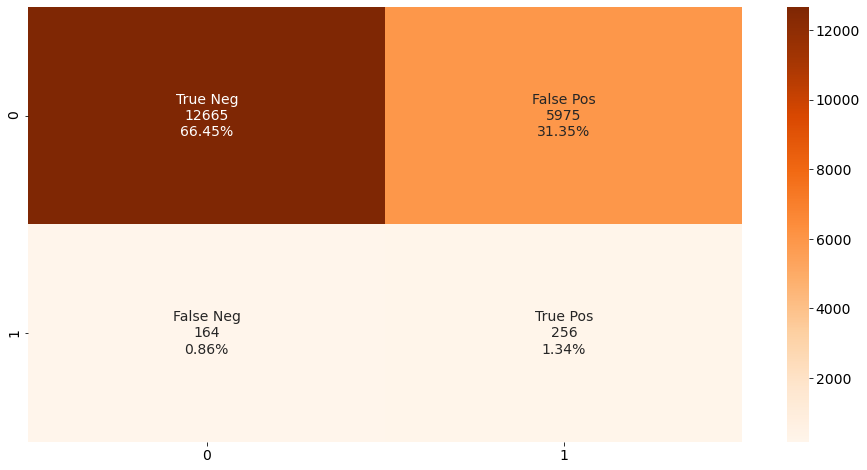

In [164]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80     18640
           1       0.04      0.61      0.08       420

    accuracy                           0.68     19060
   macro avg       0.51      0.64      0.44     19060
weighted avg       0.97      0.68      0.79     19060



## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions